In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

print('success!!')

success!!


In [245]:
x,y,actualCenters = make_blobs(n_samples = 600,n_features = 2,centers = 6,return_centers = True,random_state = 4)
print(x.shape,y.shape,actualCenters.shape)

(600, 2) (600,) (6, 2)


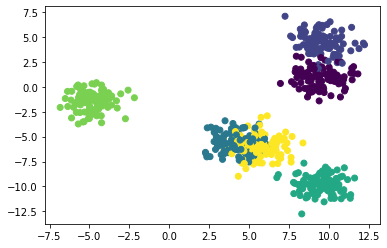

In [246]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [247]:
K = 6 
clusters = {}
color = ['red','green','blue','yellow','orange','violet']

for i in range(K):
        
    points = []
    
    pt = np.array(8*(2*np.random.random((2,))-1))
    
    cluster = {
        'Center' : pt,
        'Points' : points,
        'colour' : color[i]
    }
    
    clusters[i] = cluster

In [248]:
clusters

{0: {'Center': array([-5.02146036,  7.05491854]),
  'Points': [],
  'colour': 'red'},
 1: {'Center': array([ 7.38513655, -5.36626629]),
  'Points': [],
  'colour': 'green'},
 2: {'Center': array([ 7.7655461 , -1.06768883]),
  'Points': [],
  'colour': 'blue'},
 3: {'Center': array([-5.60883702, -0.02668494]),
  'Points': [],
  'colour': 'yellow'},
 4: {'Center': array([-1.37055372,  1.37778177]),
  'Points': [],
  'colour': 'orange'},
 5: {'Center': array([-3.75295459, -3.6036822 ]),
  'Points': [],
  'colour': 'violet'}}

## - perform the E step

In [249]:
def findDistance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [250]:
def modifyClusters(clusters):
    
    for j in range(x.shape[0]):
        dist = []

        for i in range(K):
            d = findDistance(x[j],clusters[i]['Center'])
            dist.append(d)
        
        idx = np.argmin(dist)
        clusters[idx]['Points'].append(x[j])

In [251]:
modifyClusters(clusters)

In [252]:
for i in range(K):
    print(len(clusters[i]['Points']))

0
299
201
64
2
34


In [253]:
def plotClusters(clusters):
    
    for i in range(K):
        pts = np.array(clusters[i]['Points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[i]['colour'])
        except:
            pass
        
        center = np.array(clusters[i]['Center'])
        plt.scatter(center[0],center[1],c = 'black',marker="*")
    
    plt.show()

In [254]:
def updateCenters(clusters):
    
    for i in range(K):
        
        pts = np.array(clusters[i]['Points'])
        if(len(pts)):
            new_center = np.mean(pts,axis = 0)
        else:
            new_center = clusters[i]['Center']
            
        clusters[i]['Center'] = new_center
        
        clusters[i]['Points'] = []

In [255]:
def K_means(n_itr):
    
    while(n_itr>=0):
        
        modifyClusters(clusters)
        plotClusters(clusters)
        updateCenters(clusters)
        
        n_itr -= 1

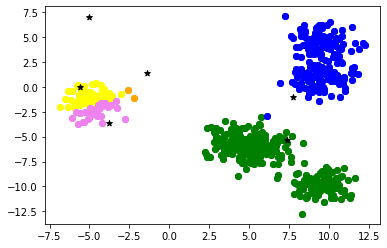

In [ ]:
K_means(10)

In [242]:
for i in range(K):
    print(clusters[i]['Center'])

[ 0.60707453 -2.65781436]
[-1.74873923  1.74686389]
[-1.30772084  8.776327  ]
[7.7221305  0.68720452]
[-8.30296578  1.86584509]
[ 4.37786295 -6.50135383]


In [243]:
print(actualCenters)

[[-7.86523595  3.68685267]
 [ 0.69925235 -2.61625847]
 [-1.74770713  1.75694952]
 [ 4.32147577 -6.53331922]
 [-8.66515413  0.01357745]
 [-1.3570561   8.93351844]]
